# Testing confidence interval procedure by simulation

Set up a sequence of values $x_1, x_2, \dots x_n$ and sample a corresponding response $ y_1, y_2, \dots y_n$, each normally distributed around the value of the model equation at the corresponging $x$, that is $y_j \stackrel{iid}{\sim} \mathcal{N}(a-b\times e^{-c x_j},\,\sigma^2)\,$

In [143]:
#libraries
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
from scipy.stats import t as t

Set up functions to simulate the data

Text(0.5,1,'Scatter plot of the simulated data')

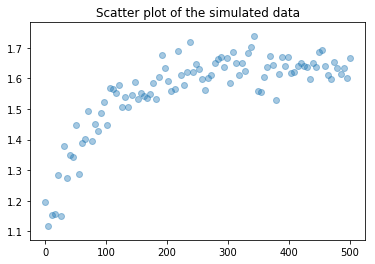

In [138]:
# sample parameters which are plausible for my data

a = 1.632
b = 0.5209
c = 0.0137

# setting up an exponential decay function
def decay(x, intercept, factor, exponent):
    return intercept - factor * np.exp(-exponent * x)

# a function to generate exponential decay with gaussian noise
def generate(intercept, factor, exponent):
    x = np.linspace(0.5,500,num=100)
    y = decay(x, intercept, factor, exponent) + np.random.normal(loc = 0, scale = 0.05, size = 100)
    return(x, y)

# plot and generate some data
np.random.seed(1)
x_array, y_array = generate(a,b,c)
plt.scatter(x_array, y_array, alpha = 0.4)
plt.title('Scatter plot of the simulated data')

Fit the model with `curve_fit` and plot the line of best fit

[1.64244681 0.52817317 0.01264053]


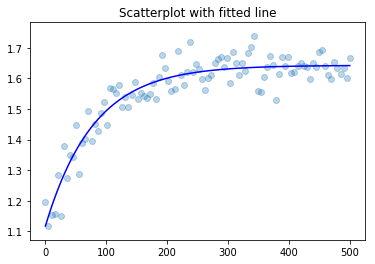

In [139]:
# recording the parameter estimates and their covariance
pars, pcov = curve_fit(decay, x_array, y_array)

# plotting 
plt.scatter(x_array, y_array, alpha = 0.3)
fit = decay(x_array, pars[0], pars[1], pars[2])
plt.plot(x_array,fit,'b-')
plt.title('Scatterplot with fitted line')

print(pars)

Simulating data and calculating confidence intervals for the parameters

In [161]:
repeats = 10000 # number of simulation runs
alpha = 0.05 # confidence interval threshold

# setting up lists to record estimates
est_intercept = []
est_factor = []
est_exponent = []

# and lists for confidence intervals' endpoints
left_0 = [] # 0 for the first entry of the parameters vector pars[0]
left_1 = []
left_2 = []

right_0 = []
right_1 = []
right_2 = []

for i in range(repeats):
    
    # simulating data
    x_array, y_array = generate(a,b,c)
       
    # fitting the decay model
    pars, pcov = curve_fit(decay, x_array, y_array)
    
    # recording the estimates in the corresponding lists
    est_intercept.append(pars[0])
    est_factor.append(pars[1])
    est_exponent.append(pars[2])

    #setting up the values for calcualting the confidence intervals
    n = len(x_array)    # number of data points
    p = len(pars) # number of parameters
    dof = max(0, n - p) # degrees of freedom
    tval = t.ppf(1.0-alpha/2, dof) # student-t value for the dof and confidence level
        
    sigma = np.diag(pcov)[0]**0.5 #standard error
    left_0.append(pars[0] - sigma*tval) # recording the left side of the CI
    right_0.append(pars[0] + sigma*tval)
    
    sigma = np.diag(pcov)[1]**0.5    
    left_1.append(pars[1] - sigma*tval)
    right_1.append(pars[1] + sigma*tval)
    
    sigma = np.diag(pcov)[2]**0.5
    left_2.append(pars[2] - sigma*tval)
    right_2.append(pars[2] + sigma*tval) 


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in multiply
  if __name__ == '__main__':


Calculating the numeber of simulated runs when the estimates fall outside the confidence intervals

In [164]:
Intercept_trials = pd.DataFrame(list(zip(est_intercept, left_0, right_0)), 
               columns =['Intercept', 'Left Bound', 'Right Bound'])

Factor_trials = pd.DataFrame(list(zip(est_factor, left_1, right_1)),
                            columns =['Factor', 'Left Bound', 'Right Bound'])

Exponent_trials = pd.DataFrame(list(zip(est_exponent, left_2, right_2)),
                              columns = ['Exponent', 'Left Bound', 'Right Bound'])

print( str(sum(a < Intercept_trials['Left Bound'])+ sum(a > Intercept_trials['Right Bound'])) + ' out of ' + str(repeats) + ' don\'t contain the true value for the intercept')
print( 'expected ' + str(repeats*alpha) + ' instead')


print('similarly:')
print( sum(b < Factor_trials['Left Bound']) + sum(b > Factor_trials['Right Bound']))
print( sum(c < Exponent_trials['Left Bound']) + sum(c > Exponent_trials['Right Bound']))


# Takes a while to run with 10 000 so:
# > 494 out of 10000 don't contain the true value for the intercept
# > expected 500.0 instead
# > similarly
# > 512
# > 526

Intercept_trials

494 out of 10000 don't contain the true value for the intercept
expected 500.0 instead
similarly:
512
526


,Intercept,Left Bound,Right Bound
0,1.629006,1.616474,1.641538
1,1.641687,1.626982,1.656393
2,1.626954,1.612422,1.641485
3,1.637271,1.621824,1.652718
4,1.642236,1.626733,1.657738
5,1.637518,1.619772,1.655264
6,1.623782,1.609980,1.637584
7,1.627463,1.612308,1.642618
8,1.635506,1.621134,1.649877
9,1.635903,1.618345,1.653462
